## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_merge = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
study_merge = pd.DataFrame(study_merge)
study_merge = study_merge.sort_values(['Mouse ID','Timepoint'], ascending = True)
study_animals = study_merge.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep='first') 
study_animals.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [6]:
# Checking the number of mice.
mouse_count = study_merge['Mouse ID'].nunique()
mouserow_count = study_merge['Mouse ID'].count()
print(f'There are {mouse_count} mice and {mouserow_count} mouse rows in this study.')

There are 249 mice and 1893 mouse rows in this study.


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Mouse_Timepoint = study_merge[['Mouse ID','Timepoint']]
duplicated_mice = Mouse_Timepoint.duplicated(['Mouse ID','Timepoint'])
duplicated = Mouse_Timepoint[duplicated_mice]
duplicated = pd.DataFrame(duplicated)
duplicated

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice = study_merge.duplicated(['Mouse ID','Timepoint'])
duplicated = study_merge[duplicated_mice]
duplicated = pd.DataFrame(duplicated)
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_animals = study_merge.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep='first') 

In [10]:
# Checking the number of mice in the clean DataFrame.
mice_count = study_animals['Mouse ID'].nunique()
mouserow_count = study_animals['Mouse ID'].count()
print(f'There are {mouse_count} mice and {mouserow_count} mouse rows in this study.')

There are 249 mice and 1888 mouse rows in this study.


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_group = study_animals.groupby(['Drug Regimen', 'Timepoint'])
tvolume_mean = round(mouse_group['Tumor Volume (mm3)'].mean(), 1)
tvolume_median = round(mouse_group['Tumor Volume (mm3)'].median(), 1)
tvolume_var = round(mouse_group['Tumor Volume (mm3)'].var(), 1)
tvolume_SD = round(mouse_group['Tumor Volume (mm3)'].std(), 1)
tvolume_SEM = round(mouse_group['Tumor Volume (mm3)'].sem(), 1)

tvolume_stats = {'Mean': tvolume_mean,
                'Median': tvolume_median,
                'Variance': tvolume_var,
                'St. Dev': tvolume_SD,
                'SEM': tvolume_SEM}
tvolume_stats = pd.DataFrame(tvolume_stats)
tvolume_stats.head()

Mean  Median  Variance  St. Dev  SEM
Drug Regimen Timepoint                                      
Capomulin    0          45.0    45.0       0.0      0.0  0.0
             5          44.3    45.6       5.0      2.2  0.4
             10         43.1    43.4      12.3      3.5  0.7
             15         42.1    42.8      16.9      4.1  0.8
             20         40.7    40.7      19.0      4.4  0.9

In [12]:
# Generate an aggregated summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tvolume_agg_stats = mouse_group['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']).round(1)
tvolume_agg_stats.head()

mean  median   var  std  sem
Drug Regimen Timepoint                              
Capomulin    0          45.0    45.0   0.0  0.0  0.0
             5          44.3    45.6   5.0  2.2  0.4
             10         43.1    43.4  12.3  3.5  0.7
             15         42.1    42.8  16.9  4.1  0.8
             20         40.7    40.7  19.0  4.4  0.9

## Bar and Pie Charts

Text(0, 0.5, 'Number of Animals')

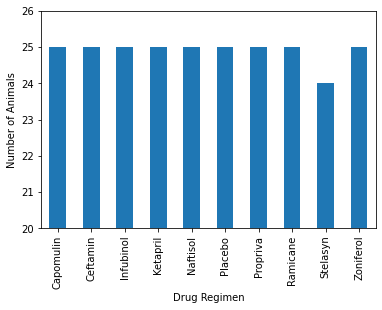

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_group = study_animals[['Mouse ID', 'Drug Regimen']].groupby('Drug Regimen')
mice_count = mouse_group['Mouse ID'].nunique()
drug_regimen = mouse_group['Drug Regimen'].unique()
mice_count.plot(kind='bar')

plt.ylim(20,26)
plt.ylabel("Number of Animals")

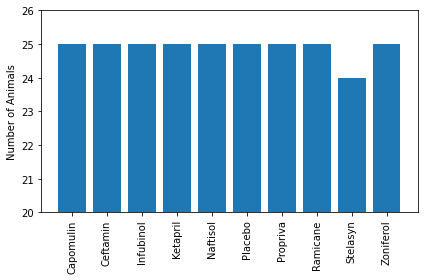

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_list = list(mice_count)
drug_list = list(drug_regimen.keys())

plt.bar(drug_list,mice_list)


plt.ylim(20,26)
plt.ylabel("Number of Animals")
plt.xticks(rotation=90)
plt.tight_layout()

Text(0, 0.5, 'Animal Sex')

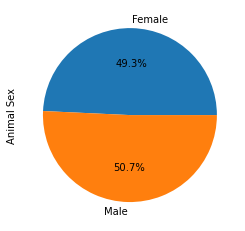

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = study_animals[['Mouse ID', 'Drug Regimen','Sex']].groupby('Sex')
sex_count = sex_group['Mouse ID'].count()

# drug_regimen = sex_group['Drug Regimen'].unique()
sex_count.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel("Animal Sex")

Text(0, 0.5, 'Animal Sex')

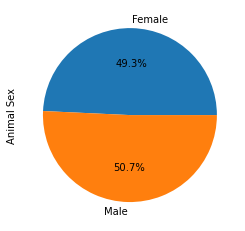

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count_list = list(sex_count)
sex_list = list(sex_count.keys())

plt.pie(sex_count_list, labels=sex_list, autopct="%1.1f%%")
plt.ylabel("Animal Sex")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
drugs = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
condition1 = study_animals['Drug Regimen'].isin(drugs)
condition2 = study_animals['Timepoint'] == 45
last_tp = study_animals.loc[(condition1) & (condition2)]
last_tp = last_tp.sort_values('Drug Regimen')
last_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
380,l509,Capomulin,Male,17,21,45,41.483008,3
39,m601,Capomulin,Male,22,17,45,28.430964,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
134,r554,Capomulin,Female,8,17,45,32.377357,3
337,j119,Capomulin,Female,7,23,45,38.125164,1
...,...,...,...,...,...,...,...,...
194,j989,Ramicane,Male,8,19,45,36.134852,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
114,n364,Ramicane,Male,4,17,45,31.095335,1
74,m546,Ramicane,Male,18,16,45,30.564625,1


In [33]:
capomulin_tv = last_tp.loc[last_tp['Drug Regimen'] == 'Capomulin'].iloc[:,6]
ramicane_tv = last_tp.loc[last_tp['Drug Regimen'] == 'Ramicane'].iloc[:,6]
infubinol_tv = last_tp.loc[last_tp['Drug Regimen'] == 'Infubinol'].iloc[:,6]
ceftamin_tv = last_tp.loc[last_tp['Drug Regimen'] == 'Ceftamin'].iloc[:,6]

cap_qrt = capomulin_tv.quantile([0.25,0.5,0.75])
cap_lowerq = round(cap_qrt[0.25],1)
cap_upperq = round(cap_qrt[0.75], 1)
cap_iqr = round(cap_upperq - cap_lowerq, 1)
cap_lower_bound = round(cap_lowerq - (1.5 * cap_iqr), 1)
cap_upper_bound = round(cap_upperq + (1.5 * cap_iqr), 1)
# print(f'lowerq: {cap_lowerq} | upperq: {cap_upperq} | iqr: {cap_iqr} | lower bound: {cap_lower_bound} | upper bound: {cap_upper_bound}')

ram_qrt = ramicane_tv.quantile([0.25,0.5,0.75])
ram_lowerq = round(ram_qrt[0.25], 1)
ram_upperq = round(ram_qrt[0.75], 1)
ram_iqr = round(ram_upperq - ram_lowerq, 1)
ram_lower_bound = round(ram_lowerq - (1.5 * ram_iqr), 1)
ram_upper_bound = round(ram_upperq + (1.5 * ram_iqr), 1)
# print(f'lowerq: {ram_lowerq} | upperq: {ram_upperq} | iqr: {ram_iqr} | lower bound: {ram_lower_bound} | upper bound: {ram_upper_bound}')

inf_qrt = infubinol_tv.quantile([0.25,0.5,0.75])
inf_lowerq = round(inf_qrt[0.25], 1)
inf_upperq = round(inf_qrt[0.75], 1)
inf_iqr = round(inf_upperq - inf_lowerq, 1)
inf_lower_bound = round(inf_lowerq - (1.5 * inf_iqr), 1)
inf_upper_bound = round(inf_upperq + (1.5 * inf_iqr), 1)
# print(f'lowerq: {inf_lowerq} | upperq: {inf_upperq} | iqr: {inf_iqr} | lower bound: {inf_lower_bound} | upper bound: {inf_upper_bound}')

cef_qrt = ceftamin_tv.quantile([0.25,0.5,0.75])
cef_lowerq = round(cef_qrt[0.25], 1)
cef_upperq = round(cef_qrt[0.75], 1)
cef_iqr = round(cef_upperq - cef_lowerq, 1)
cef_lower_bound = round(cef_lowerq - (1.5 * cef_iqr), 1)
cef_upper_bound = round(cef_upperq + (1.5 * cef_iqr), 1)
# print(f'lowerq: {cef_lowerq} | upperq: {cef_upperq} | iqr: {cef_iqr} | lower bound: {cef_lower_bound} | upper bound: {cef_upper_bound}')

drug_qrt_summary = {'Drug Regimen': drugs,
                    'Lower q': [cap_lowerq, ram_lowerq, inf_lowerq, cef_lowerq],
                    'Upper q': [cap_upperq, ram_upperq, inf_upperq, cef_upperq],
                    'IQR': [cap_iqr, ram_iqr, inf_iqr, cef_iqr],
                    'Lower bound': [cap_lower_bound, ram_lower_bound, inf_lower_bound, cef_lower_bound],
                    'Upper bound': [cap_upper_bound, ram_upper_bound, inf_upper_bound, cef_upper_bound]}

drug_qrt_summary = pd.DataFrame(drug_qrt_summary)


,Drug Regimen,Lower q,Upper q,IQR,Lower bound,Upper bound
0,Capomulin,32.4,40.2,7.8,20.7,51.9
1,Ramicane,31.0,38.5,7.5,19.8,49.8
2,Infubinol,62.8,67.7,4.9,55.4,75.0
3,Ceftamin,61.4,67.5,6.1,52.2,76.6


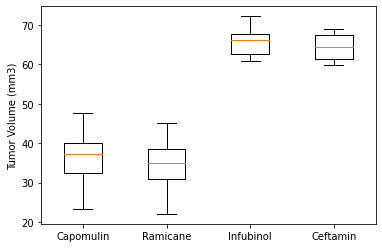

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plots = [capomulin_tv, ramicane_tv, infubinol_tv, ceftamin_tv]
plt.boxplot(plots, sym = 'o', showfliers=True)

plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

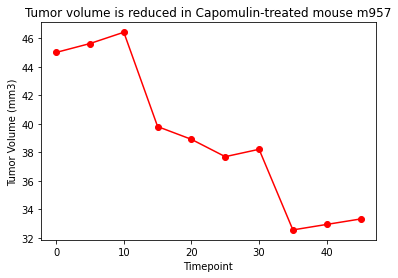

In [80]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
timepoints = study_animals['Timepoint'].unique()
m957 = study_animals[study_animals['Mouse ID'] == 'm957']
m957 = m957['Tumor Volume (mm3)']

plt.plot(timepoints, m957, color='red', marker = 'o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor volume is reduced in Capomulin-treated mouse m957')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
